# **DSBA 6165: Applied Machine Learning**

Professor: Rick Chakra

TA: Spencer Tilley

## Linear Regression

For this implementation, we will use a College Admission Dataset. What we intend to see is:

How to perform linear regression using python / sklearn and extend it with ridge and lasso regularization techniques

### Load Packages

The first step is to import the required libraries for the code to run. These libraries include pandas, numpy, seaborn, matplotlib.pyplot, scikit-learn's train_test_split, LinearRegression, Ridge, RidgeCV, Lasso, and StandardScaler from scikit-learn datasets. To import these libraries, use the import keyword followed by the library name.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
# Load csv file as df
df = pd.read_csv("Admission.csv")
#Display df
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


The dataset might need some cleaning or preprocessing before it can be used for analysis. Here, we will not be doing any data preprocessing as the dataset is already clean and ready to use.

### Split the dataset

Seperate the last column since this is the target variable

In [3]:
X, y = df.iloc[:,:-1],df.iloc[:,8]

Split the dataset into training and testing datasets using scikit-learn's train_test_split function. This is done to train the model on the training dataset and test its accuracy on the testing dataset. The function takes the dataset, the target variable, and the test_size as input parameters.

In [4]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# Print the shape of the training and testing data
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

#Call the Scaler function
scaler = StandardScaler()

# Scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (350, 8)
The dimension of X_test is (150, 8)


## Linear and Ridge Regression Models
We will build a linear and a ridge regression model and then compare the coefficients in a plot. The code creates a linear regression model object using scikit-learn's LinearRegression class, fits the model on the training data, and evaluates the model's performance by calculating the R-squared scores on both the training and test data. Finally, the code prints the calculated scores for both the training and test data using the print function. The score of the train and test sets will also help us evaluate how well the model performs.

In [5]:
# Instantiate the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predict values on X_test
prediction = lr.predict(X_test)

# Store true labels in an object
actual = y_test

# Compute scores for training and test data
train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

# Print the scores
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.8213769349893634
The test score for lr model is 0.8402115249905235


## Ridge Regression

The first step is to create a Ridge regression model object using the Ridge class from the scikit-learn library. An alpha value of 10 is specified for regularization, which controls the strength of regularization. The Ridge regression model is then fit using the fit method on the training data, X_train and y_train. The model is evaluated by calculating the R-squared scores on both the training and test data, using the score method on the Ridge regression model object. The resulting scores are assigned to 'train_score_ridge' and 'test_score_ridge', respectively. Finally, the calculated R-squared scores for both the training and test data are printed using the print function. The Ridge regression model is particularly useful in addressing multicollinearity in the dataset.

In [6]:
#Ridge Regression Model
# Instantiate the model and set penalization factor for coefficient magnitudes
ridgeReg = Ridge(alpha=5)

# Fit the model
ridgeReg.fit(X_train,y_train)

# Compute train and test score for ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

# Print the scores
print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.821213459915775
The test score for ridge model is 0.8419488277556534


Using an alpha value of 10, the evaluation of the model, the train, and test data indicate better performance on the ridge model than on the linear regression model.

We can also plot the coefficients for both the linear and ridge models.

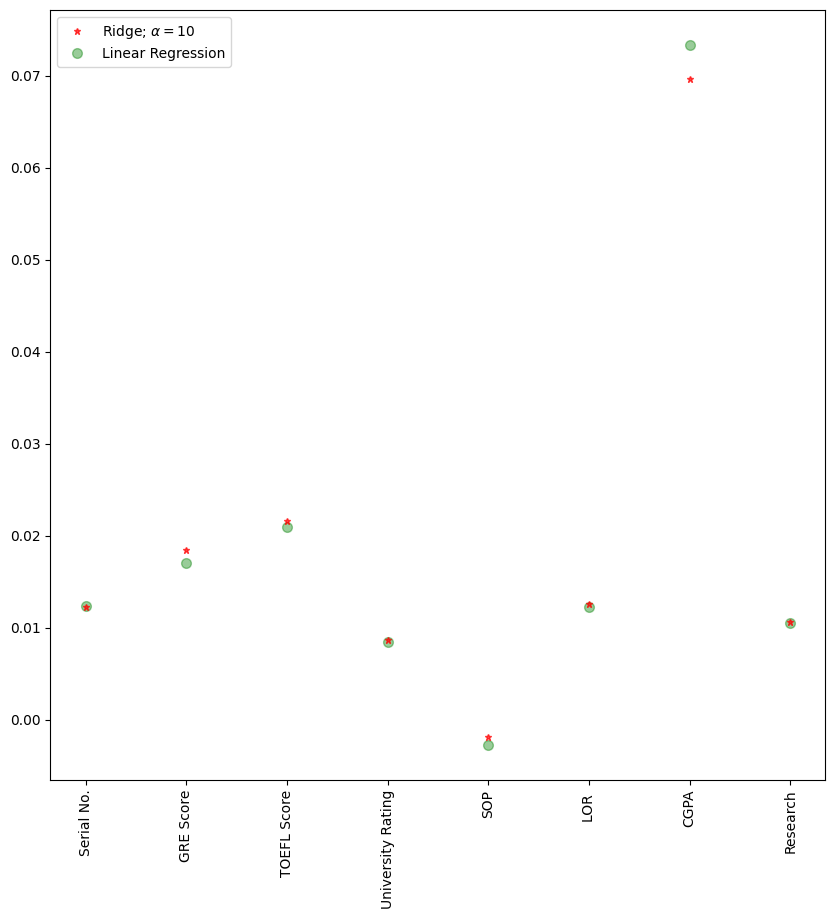

In [7]:
# Plot the coefficients for both models
plt.figure(figsize = (10, 10))
plt.plot(X.columns,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

##  Lasso Regression

The provided code also includes instructions for implementing a Lasso regression model to the same dataset. The first step is to create a Lasso regression model object using the Lasso class from the scikit-learn library. An alpha value of 10 is specified for regularization, which controls the strength of regularization. The Lasso regression model is then fit using the fit method on the training data, X_train and y_train. The model is evaluated by calculating the R-squared scores on both the training and test data, using the score method on the Lasso regression model object. The resulting scores are assigned to 'train_score_ls' and 'test_score_ls', respectively. Finally, the calculated R-squared scores for both the training and test data are printed using the print function. Lasso regression is a useful technique for feature selection as it automatically performs variable selection and reduces the coefficients of less important features to zero.

In [8]:
## Lasso regression model
print("\nLasso Model............................................\n")
# Instantiate the model
lasso = Lasso(alpha = 10)

# Fit the model
lasso.fit(X_train,y_train)

# Compute train and test score for lasso regression
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

# Print the scores
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.000266830598238732


We can visualize the coefficients too.

<Axes: >

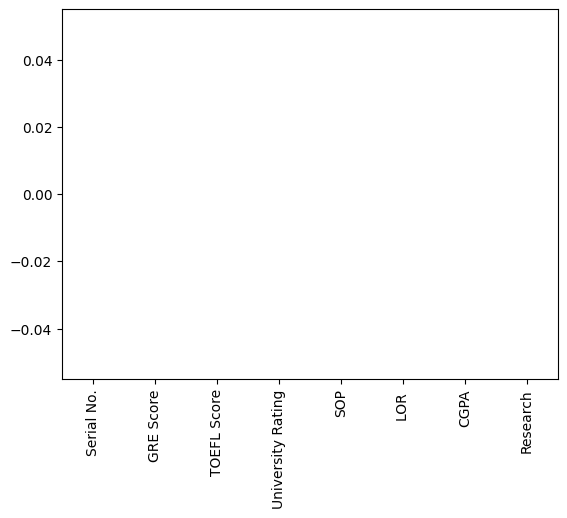

In [9]:
# Plot the coefficients of the Lasso regression
pd.Series(lasso.coef_, X.columns).sort_values(ascending = True).plot(kind = "bar")

Earlier on, we established that the lasso model can inert to zero due to the diamond shape of the constraint region. In this case, using an alpha value of 10 over penalizes the model and shrinks all the values to zero. We can see this effectively by visualizing the coefficients of the model as shown in the figure above.

## Selecting Optimal Alpha Values Using Cross-Validation in Sklearn

We may need to try out different alpha values to find the optimal constraint value. For this case, we can use the cross-validation model in the sklearn package. This will try out different combinations of alpha values and then choose the best model.

In [10]:
# Using the linear CV model
from sklearn.linear_model import LassoCV

# Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


train_score_lscv = lasso_cv.score(X_train, y_train)
test_score_lscv = lasso_cv.score(X_test, y_test)

# Print scores
print('Selected alpha is: {}'.format(lasso_cv.alpha_))

print("The train score for ls model is {}".format(train_score_lscv))
print("The test score for ls model is {}".format(test_score_lscv))

Selected alpha is: 0.001
The train score for ls model is 0.8210709736775825
The test score for ls model is 0.8419238598336152


The model will be trained on different alpha values that I have specified in the LassoCV function. We can observe a better performance of the model, removing the tedious effort of manually changing alpha values.

We can compare the coefficients from the lasso model with the rest of the models (linear and ridge).

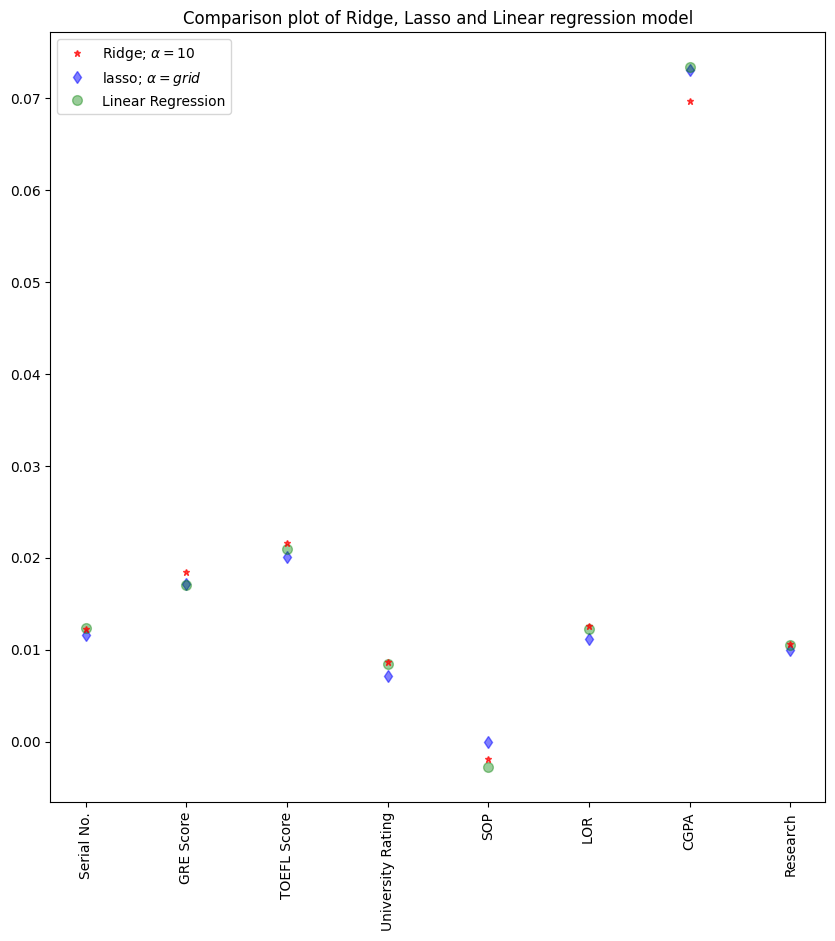

In [11]:
# Plot size
plt.figure(figsize = (10, 10))

# Add plot for ridge regression
plt.plot(X.columns,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

# Add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

# Add plot for linear model
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

# Rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

Note: A similar approach could be employed for the ridge regression model, which could lead to better results. In the sklearn package, the function RidgeCV performs similarly.

## Conclusion
We have seen an implementation of ridge and lasso regression models and the theoretical and mathematical concepts behind these techniques. Some of the key takeaways from this tutorial include:

1. The cost function for both ridge and lasso regression are similar. However, ridge regression takes the square of the coefficients and lasso takes the magnitude.
2. Lasso regression can be used for automatic feature selection, as the geometry of its constrained region allows coefficient values to inert to zero.
3. An alpha value of zero in either ridge or lasso model will have results similar to the regression model.
4. The larger the alpha value, the more aggressive the penalization.

## Logistic Regression and SVM

We are gonna start off with importing a dataset about credit card approvals




In [12]:
# Load dataset
cc_apps = pd.read_csv("cc_approval.data", header=None)
# Drop the features 11 and 13 (Not Useful - Zipcode and passport status)
cc_apps = cc_apps.drop([11, 13], axis=1)
#Change column names to actual headers
cc_apps.columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'Citizen', 'Income', 'ApprovalStatus']
# Inspect data
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


This dataset uses '?'s instead of null to mark missing data so we need to convert them into nulls to be able to replace them

In [13]:
# Replace the '?'s with NaN in the train and test sets
cc_apps = cc_apps.replace('?', np.NaN)
# Impute the missing values of numeric columns with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)
# Impute non-numerical columns with mean
# Iterate over each column of cc_apps
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

<ipython-input-13-7a48ed2503f4>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cc_apps.fillna(cc_apps.mean(), inplace=True)


In [14]:
#Remove non-numerical values of age
cc_apps = cc_apps.drop(cc_apps[cc_apps['Age'] == 'b'].index)
# get dummy variables for categorical variables
dummy_data = pd.get_dummies(cc_apps[['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'CreditScore', 'Citizen']],drop_first=True)
#create List of num variables
num_names = ['Age','Debt','YearsEmployed','Income']
#Combine to make X
X = pd.concat([cc_apps[num_names],dummy_data],axis=1)
#Create y
y = cc_apps['ApprovalStatus']

In [15]:
# Instantiate scaler and fit on features
scaler = StandardScaler()
scaler.fit(X)

# Transform features
X_scaled = scaler.transform(X.values)

# View first instance
print(X_scaled[0])

[-0.0617766  -0.9567587  -0.28648283 -0.19459252 -0.29327605  0.66294076
 -0.05439283  0.57167314 -0.55349651  0.57167314 -0.05439283 -0.55349651
 -0.1159867  -0.50092166 -0.25370102 -0.20365327 -0.19566512 -0.28520118
 -0.30296442 -0.1223522  -0.28216632 -0.24366986 -0.36055513 -0.06666667
  3.09737792 -0.23680111 -0.30296442 -0.09449112 -0.29712372 -0.50552503
 -0.10927167 -0.07703712 -0.05439283  0.85674696 -0.10927167  0.95386538
  1.14629541 -0.10927167 -0.29712372]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The last step before creating models is to split the data like we have done before

In [16]:
# Split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, train_size=.7, random_state=25)

We can actually create two models of different types at the same time! You can do even more if you wanted!

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Instnatiating the Logistic Regression Model
logistic_regression = LogisticRegression()

# Instnatiating the SVM Model
svm = SVC()

# Training the Logistic Regression Model
logistic_regression.fit(X_train_scaled, y_train)

# Training the SVM Model
svm.fit(X_train_scaled, y_train)

# Making predictions with the Logistic Regression Model
log_reg_preds = logistic_regression.predict(X_test_scaled)

# Making predictions with the SVM Model
svm_preds = svm.predict(X_test_scaled)

Now that we have our models made and predictions for both models, we need to create a classification Report to get all of our different model evaluation metrics

In [18]:
from sklearn.metrics import classification_report

# Store model predictions in a dictionary
# this makes it's easier to iterate through each model
# and print the results.
model_preds = {
    "Logistic Regression": log_reg_preds,
    "Support Vector Machine": svm_preds,
}

for model, preds in model_preds.items():
    print(f"{model} Results:\n{classification_report(y_test, preds)}", sep="\n\n")


Logistic Regression Results:
              precision    recall  f1-score   support

           +       0.81      0.87      0.84        98
           -       0.87      0.81      0.84       106

    accuracy                           0.84       204
   macro avg       0.84      0.84      0.84       204
weighted avg       0.84      0.84      0.84       204

Support Vector Machine Results:
              precision    recall  f1-score   support

           +       0.81      0.85      0.83        98
           -       0.85      0.81      0.83       106

    accuracy                           0.83       204
   macro avg       0.83      0.83      0.83       204
weighted avg       0.83      0.83      0.83       204



As you can see its rather easy to create a few models of different types using the same data. Thats why a large amount of your time as a data scientist will be cleaning data and data transformation.